In [1]:
import os, time, librosa, librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, Adam

import audio_data_loader as audioloader
import audio_data_writer as audiowriter
import dataset_loader as dataset
import references as ref

### Neural network model builder

In [2]:
def get_model(input_size):
    
    model = Sequential()
    model.add(Dense(400, activation = 'relu', input_shape = (input_size,)))
    model.add(Dense(320, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = Adam(learning_rate = 0.001),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
    
    return model

In [15]:
def get_prediction(sample_path, model):
    
    y, sr = audioloader.read_audio(sample_path)
    
    sound_sample = dataset.get_features(y, sr)
    sound_sample = np.array(sound_sample)
    
    x = np.expand_dims(sound_sample, axis = 0)
    
    y_pred = model.predict(x)
    value = y_pred[0][0]
    index = round(value)
    
    return 'Gender definded - {} / value = {}'.format(ref.gender_ref[index], value)

### Visualizations

In [4]:
def show_accuracy(data):
    
    fig, ax = plt.subplots(figsize = (15, 6))
    
    ax.plot(data.epoch, data.history['accuracy'], label = 'Accuracy')
    ax.plot(data.epoch, data.history['val_accuracy'], label = 'Validation Accuracy')
    
    plt.legend()
    plt.show()

### Training process

In [5]:
source = audioloader.create_source_dataset(ref.root_path)

Data source array is prepared - 0.02095174789428711 c


In [6]:
x_train, x_val, y_train, y_val = dataset.get_dataset(source)

1440it [10:18,  2.33it/s]


In [7]:
model = get_model(x_train.shape[1])

In [8]:
history = model.fit(x_train, y_train, batch_size = 50, epochs = 50, validation_split = 0.1)

Epoch 1/50
24/24 [==============================] - 1s 15ms/step - loss: 51.0537 - accuracy: 0.5412 - val_loss: 14.2431 - val_accuracy: 0.5538
Epoch 2/50
24/24 [==============================] - 0s 5ms/step - loss: 10.3245 - accuracy: 0.6192 - val_loss: 3.5867 - val_accuracy: 0.7154
Epoch 3/50
24/24 [==============================] - 0s 6ms/step - loss: 5.4674 - accuracy: 0.6655 - val_loss: 4.1679 - val_accuracy: 0.6692
Epoch 4/50
24/24 [==============================] - 0s 7ms/step - loss: 2.2755 - accuracy: 0.7333 - val_loss: 1.8698 - val_accuracy: 0.7923
Epoch 5/50
24/24 [==============================] - 0s 7ms/step - loss: 1.5189 - accuracy: 0.7564 - val_loss: 0.5162 - val_accuracy: 0.8308
Epoch 6/50
24/24 [==============================] - 0s 7ms/step - loss: 1.0721 - accuracy: 0.7864 - val_loss: 1.1758 - val_accuracy: 0.7615
Epoch 7/50
24/24 [==============================] - 0s 7ms/step - loss: 1.1300 - accuracy: 0.7401 - val_loss: 0.6478 - val_accuracy: 0.8154
Epoch 8/50
24/24

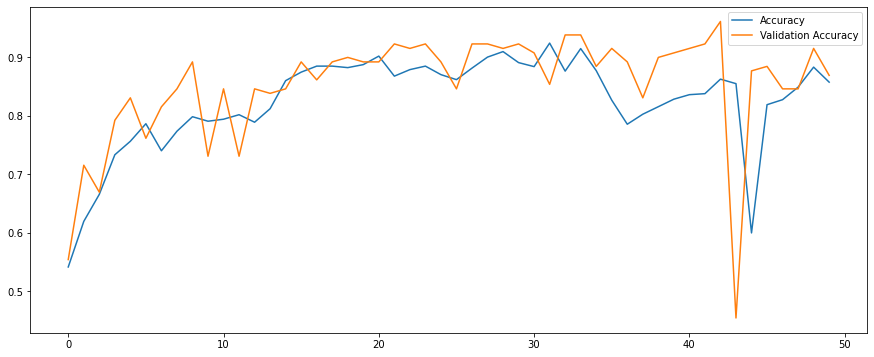

In [9]:
show_accuracy(history)

In [10]:
pred = model.evaluate(x_val, y_val)

5/5 [==============================] - 0s 2ms/step - loss: 0.2613 - accuracy: 0.8750


### Sample Audio recording

In [11]:
sample_filename = audiowriter.write_audio()

* recording
* data recording


In [16]:
result = get_prediction(sample_filename, model)
print(result)

Gender definded - male / value = 0.059354960918426514
